In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
conda install -c conda-forge matplotlib

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
from pandas.io.parsers import read_csv

In [198]:
data = read_csv("D:\price_data_sample.csv", sep=",")

In [199]:
xy = np.array(data, dtype=np.float32)

In [200]:
data.head(3)

,year,avgTemp,minTemp,maxTemp,rainFall,holiday,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,result
0,20180101,-1.3,-5.1,3.8,0.0,1.2,1,0,0,0,0,0,0,0,0,0,0,0,31558
1,20180102,-1.8,-4.3,1.8,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,9717
2,20180103,-4.7,-7.1,-0.4,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,14646


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x = xy[:,1:-1]

In [203]:
y = xy[:, -1]

In [204]:
data.head(5)

,year,avgTemp,minTemp,maxTemp,rainFall,holiday,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,result
0,20180101,-1.3,-5.1,3.8,0.0,1.2,1,0,0,0,0,0,0,0,0,0,0,0,31558
1,20180102,-1.8,-4.3,1.8,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,9717
2,20180103,-4.7,-7.1,-0.4,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,14646
3,20180104,-4.7,-8.7,-0.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,12412
4,20180105,-3.0,-5.6,1.6,0.0,1.1,1,0,0,0,0,0,0,0,0,0,0,0,13372


In [205]:
df_cor = data.corr()

In [206]:
df_cor.style.background_gradient(cmap="coolwarm").set_precision(3)

,year,avgTemp,minTemp,maxTemp,rainFall,holiday,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,result
year,1.000,-0.116,-0.122,-0.111,-0.067,0.019,0.094,0.093,0.103,0.106,0.107,-0.096,-0.094,-0.090,-0.085,-0.083,-0.077,-0.075,-0.106
avgTemp,-0.116,1.000,0.989,0.990,0.158,0.007,-0.444,-0.368,-0.158,-0.013,0.197,0.269,0.380,0.410,0.250,0.061,-0.122,-0.316,0.183
minTemp,-0.122,0.989,1.000,0.962,0.208,0.006,-0.421,-0.362,-0.169,-0.034,0.172,0.264,0.400,0.424,0.260,0.051,-0.124,-0.310,0.153
maxTemp,-0.111,0.990,0.962,1.000,0.106,0.012,-0.453,-0.365,-0.141,0.004,0.211,0.270,0.355,0.390,0.233,0.072,-0.111,-0.329,0.209
rainFall,-0.067,0.158,0.208,0.106,1.000,-0.071,-0.071,-0.050,-0.063,-0.021,0.045,0.038,0.096,0.102,0.020,0.003,-0.003,-0.065,-0.132
holiday,0.019,0.007,0.006,0.012,-0.071,1.000,-0.011,0.012,0.001,-0.027,-0.007,0.025,-0.039,0.016,0.007,0.036,-0.012,0.006,0.386
jan,0.094,-0.444,-0.421,-0.453,-0.071,-0.011,1.000,-0.112,-0.118,-0.116,-0.117,-0.093,-0.095,-0.095,-0.093,-0.095,-0.093,-0.095,-0.157
feb,0.093,-0.368,-0.362,-0.365,-0.050,0.012,-0.112,1.000,-0.112,-0.110,-0.111,-0.088,-0.089,-0.089,-0.088,-0.089,-0.088,-0.089,-0.123
mar,0.103,-0.158,-0.169,-0.141,-0.063,0.001,-0.118,-0.112,1.000,-0.116,-0.117,-0.093,-0.095,-0.095,-0.093,-0.095,-0.093,-0.095,-0.113
apr,0.106,-0.013,-0.034,0.004,-0.021,-0.027,-0.116,-0.110,-0.116,1.000,-0.115,-0.091,-0.093,-0.093,-0.091,-0.093,-0.091,-0.093,0.044


In [207]:
xy.shape

(880, 19)

In [208]:
cor_target=abs(df_cor['result'])

In [209]:
relevant_features = cor_target[cor_target>0.04].index.values.tolist()

In [210]:
df_fin=data[relevant_features]

In [211]:
df_fin.head(3)

,year,avgTemp,minTemp,maxTemp,rainFall,holiday,jan,feb,mar,apr,may,jul,aug,sep,oct,nov,dec,result
0,20180101,-1.3,-5.1,3.8,0.0,1.2,1,0,0,0,0,0,0,0,0,0,0,31558
1,20180102,-1.8,-4.3,1.8,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,9717
2,20180103,-4.7,-7.1,-0.4,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,14646


In [212]:
xy[0:3, :]

array([[ 2.0180100e+07, -1.3000000e+00, -5.0999999e+00,  3.8000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  3.1558000e+04],
       [ 2.0180102e+07, -1.8000000e+00, -4.3000002e+00,  1.8000000e+00,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  9.7170000e+03],
       [ 2.0180104e+07, -4.6999998e+00, -7.0999999e+00, -4.0000001e-01,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x = xy[:,1:-1]

In [215]:
y = xy[:,-1]

In [216]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [217]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all, test_size=0.2, random_state=42)

In [218]:
y

array([ 31558.,   9717.,  14646.,  12412.,  13372.,  23759.,  22232.,
         5228.,   7504.,   9481.,   8160.,   7870.,  19343.,  23825.,
         5656.,   7442.,  12671.,  12614.,  14874.,  28186.,  26918.,
         5586.,   5271.,   6069.,   7999.,   6908.,  15658.,  17145.,
         5117.,   7214.,  20415.,  11345.,  12154.,  17011.,  14165.,
         4296.,   5615.,   9842.,  13462.,  13118.,  22095.,  18073.,
         5445.,   8457.,  11685.,  39274.,  89394., 101258.,  52246.,
        11077.,  12264.,  22791.,  19895.,  19150.,  35003.,  35074.,
         8992.,  12410.,  15328.,  24986.,  16933.,  45870.,  22384.,
         5311.,  11799.,  16541.,  12486.,  17459.,  39961.,  41920.,
         8237.,  12892.,  23461.,   9846.,  23343.,  54259.,  39430.,
         7198.,  12099.,  14111.,  24037.,  23458.,  45221.,  40960.,
        12588.,  14154.,  36130.,  24099.,  33658.,  62028.,  49555.,
        13317.,  26355.,  37960.,  15954.,  33537.,  54495.,  43200.,
        14910.,  255

In [219]:
from sklearn.linear_model import LinearRegression as LR

In [220]:
df_fit = LR().fit(x_train, y_train)

In [221]:
y_pred = df_fit.predict(x_test)

In [222]:
import matplotlib.pyplot as plt

In [223]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

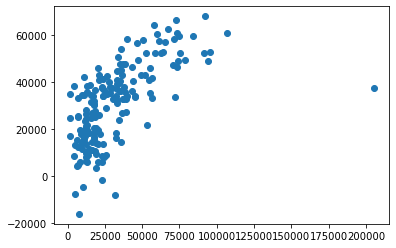

In [224]:
plt.scatter(y_test,y_pred)

In [225]:
plt.show()

In [241]:
a = np.array([[21,20,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

In [242]:
print(df_fit.predict(a))

[6726.91151428]
